Predicting the Stock prices of Netlix using Machine Learning and Python

In [17]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [18]:
data=pd.read_csv("NFLX.csv")

In [19]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-14,482.820007,488.329987,480.209991,482.679993,482.679993,2943500
1,2020-08-17,484.190002,486.239990,479.100006,482.350006,482.350006,2423500
2,2020-08-18,484.350006,495.299988,482.799988,491.869995,491.869995,3505500
3,2020-08-19,493.929993,494.500000,483.500000,484.529999,484.529999,3156200
4,2020-08-20,484.690002,498.940002,483.890015,497.899994,497.899994,5132500


In [20]:
#Get the number of trading days
data.shape

(252, 7)

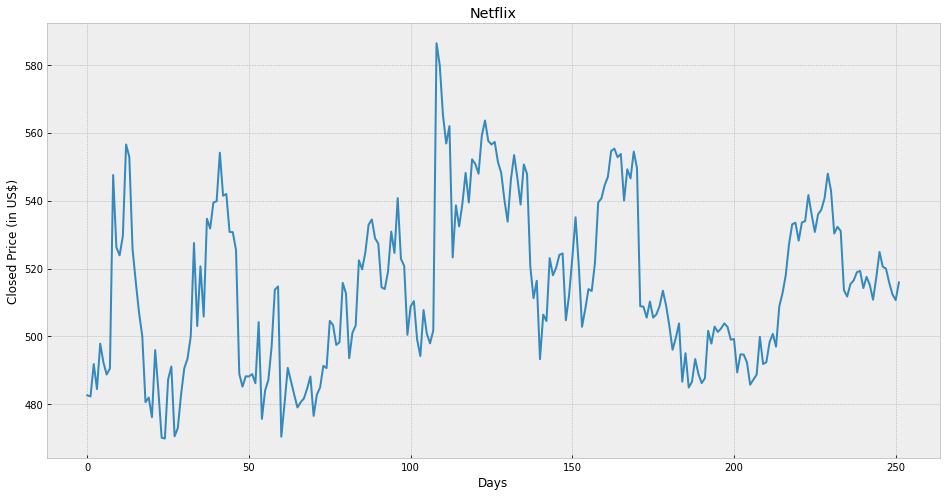

In [21]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title("Netflix")
plt.xlabel("Days")
plt.ylabel("Closed Price (in US$)")
plt.plot(data['Close'])
plt.show()

In [22]:
#Get the close price
df=data[['Close']]
df.head()

,Close
0,482.679993
1,482.350006
2,491.869995
3,484.529999
4,497.899994


In [23]:
#create a variable to predict the 'x' days out into the future
future_days=25
#create a new column (target) shifted 'x' units/days up
df['Prediction']=df[['Close']].shift(-future_days)
df.tail()

<ipython-input-23-a31d6d02e010>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']=df[['Close']].shift(-future_days)


,Close,Prediction
247,519.969971,NaN
248,515.840027,NaN
249,512.400024,NaN
250,510.720001,NaN
251,515.919983,NaN


In [24]:
#create the future data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X=np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[482.679993]
 [482.350006]
 [491.869995]
 [484.529999]
 [497.899994]
 [492.309998]
 [488.809998]
 [490.579987]
 [547.530029]
 [526.27002 ]
 [523.890015]
 [529.559998]
 [556.549988]
 [552.840027]
 [525.75    ]
 [516.049988]
 [507.019989]
 [500.190002]
 [480.670013]
 [482.029999]
 [476.26001 ]
 [495.98999 ]
 [483.859985]
 [470.200012]
 [469.959991]
 [487.350006]
 [491.170013]
 [470.609985]
 [473.079987]
 [482.880005]
 [490.649994]
 [493.480011]
 [500.029999]
 [527.51001 ]
 [503.059998]
 [520.650024]
 [505.869995]
 [534.659973]
 [531.789978]
 [539.440002]
 [539.809998]
 [554.090027]
 [541.450012]
 [541.940002]
 [530.789978]
 [530.719971]
 [525.419983]
 [489.049988]
 [485.230011]
 [488.279999]
 [488.23999 ]
 [488.929993]
 [486.23999 ]
 [504.209991]
 [475.73999 ]
 [484.119995]
 [487.220001]
 [496.950012]
 [513.76001 ]
 [514.72998 ]
 [470.5     ]
 [480.23999 ]
 [490.76001 ]
 [486.769989]
 [482.839996]
 [479.100006]
 [480.630005]
 [481.790009]
 [484.670013]
 [488.23999 ]
 [476.619995]
 [482.

In [25]:
#Create target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y=np.array(df['Prediction'])[:-future_days]
print(y)

[487.350006 491.170013 470.609985 473.079987 482.880005 490.649994
 493.480011 500.029999 527.51001  503.059998 520.650024 505.869995
 534.659973 531.789978 539.440002 539.809998 554.090027 541.450012
 541.940002 530.789978 530.719971 525.419983 489.049988 485.230011
 488.279999 488.23999  488.929993 486.23999  504.209991 475.73999
 484.119995 487.220001 496.950012 513.76001  514.72998  470.5
 480.23999  490.76001  486.769989 482.839996 479.100006 480.630005
 481.790009 484.670013 488.23999  476.619995 482.880005 485.
 491.359985 490.700012 504.579987 503.380005 497.519989 498.309998
 515.780029 512.659973 493.600006 501.089996 503.220001 522.419983
 519.780029 524.830017 532.900024 534.450012 528.909973 527.330017
 514.47998  513.969971 519.119995 530.869995 524.590027 540.72998
 522.859985 520.799988 500.48999  508.890015 510.399994 499.100006
 494.25     507.790009 500.859985 497.980011 501.769989 586.340027
 579.840027 565.169983 556.780029 561.929993 523.280029 538.599976
 532.390

In [26]:
#split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
#Create the model
#Decision tree model
dtree=DecisionTreeRegressor().fit(x_train, y_train)
#Linear regressor model
lr=LinearRegression().fit(x_train, y_train)

In [28]:
#Get the last 'x' rows of the feature dataset
x_future=df.drop(['Prediction'], 1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[494.73999 ],
       [494.660004],
       [492.390015],
       [485.809998],
       [487.269989],
       [488.769989],
       [499.890015],
       [491.899994],
       [492.410004],
       [498.339996],
       [500.769989],
       [497.      ],
       [508.820007],
       [512.73999 ],
       [518.059998],
       [527.070007],
       [533.030029],
       [533.5     ],
       [528.210022],
       [533.539978],
       [533.97998 ],
       [541.640015],
       [535.960022],
       [530.76001 ],
       [535.97998 ]])

In [30]:
#Show the model tree prediction
tree_prediction=dtree.predict(x_future)
print('Prediction of the Decision tree model')
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction=lr.predict(x_future)
print('Prediction of Linear regression model')
print(lr_prediction)

Prediction of the Decision tree model
[537.309998 537.309998 547.950012 497.519989 493.600006 532.280029
 531.049988 513.630005 511.769989 515.409973 516.48999  518.909973
 519.299988 494.660004 517.570007 515.150024 510.820007 520.549988
 524.890015 520.549988 519.969971 515.840027 512.400024 488.23999
 515.919983]

Prediction of Linear regression model
[515.8570589  515.85248412 515.72265275 515.34631056 515.42981433
 515.5156064  516.15161311 515.69462614 515.72379602 516.06296021
 516.20194297 515.98631953 516.66236144 516.88656375 517.19084008
 517.70616497 518.04704672 518.07392658 517.7713678  518.07621311
 518.1013789  518.53949241 518.21462683 517.91721364 518.21576833]


<ipython-input-32-8e3355c93e87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


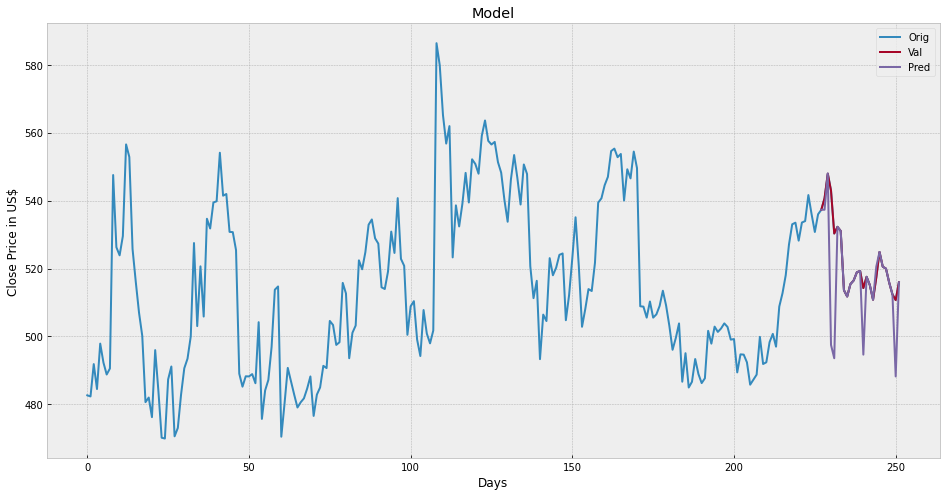

In [32]:
#Visualize the data
predictions=tree_prediction
valid=df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in US$')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

<ipython-input-33-cccfd2ccb445>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


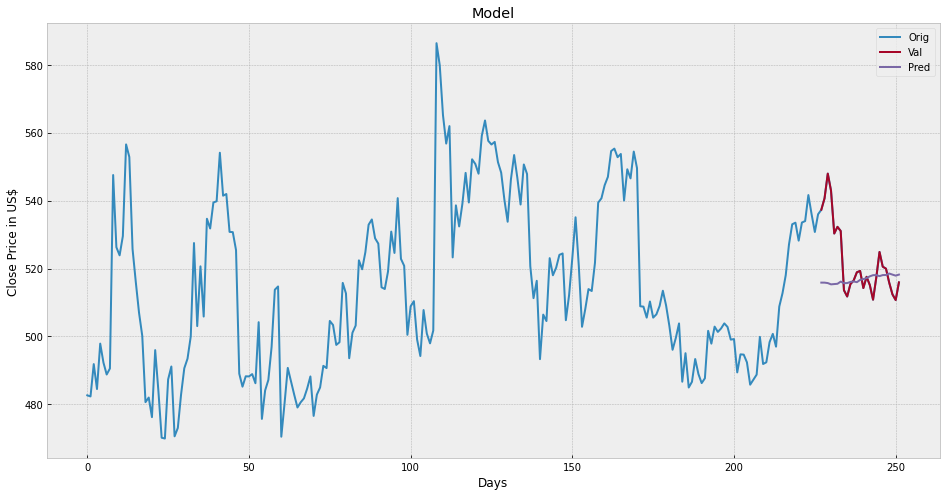

In [33]:
#Visualize the data
predictions=lr_prediction
valid=df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in US$')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()